## Girdiler

- D = {t1, t2, ... tn}
- K // küme sayısı

## Adımlar

- K adet küme için rasgele küme merkezi ata
- Her bir ti elemanını to en yakın küme merkezine ait kümeye ata
- m1, m2, ... mK değerlerini yeni elemanlarla tekrar hesapla
- Bir önceki küme merkezlerinden hiç biri değişmezse DUR
- Else LOOP

## Çıktı

- K adet küme ve elemanları

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [46]:
df = pd.read_csv('data.csv')

In [47]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [48]:
k = 2
kmeans = KMeans(n_clusters=k)  # kaç kümeye ayıracağımızı veriyoruz

In [49]:
kmeans.fit(df)  # modeli eğitiyoruz

KMeans(n_clusters=2)

In [50]:
labels = kmeans.labels_  # label'ları alıyoruz

In [51]:
centroids = kmeans.cluster_centers_  # küme merkezlerini alıyoruz

In [52]:
x_test = [[4.671, 67], [2.885, 61], [1.666, 90],
          [5.623, 54], [2.678, 80], [1.875, 60]]
# tahmin edeceğimiz veriyi hazırlıyoruz

In [53]:
prediction = kmeans.predict(x_test)

In [54]:
# 1 çıkanlar aynı kümede, 0 çıkanlar aynı kümede (çünkü 2 kümeye ayırdık algoritmayı)
prediction

array([0, 0, 1, 0, 1, 0], dtype=int32)

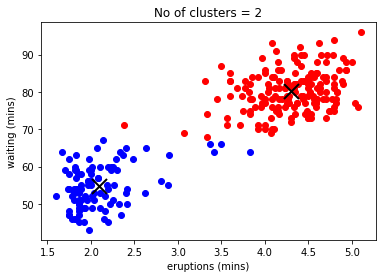

In [56]:
colors = ['blue',
          'red',
          'green',
          'black',
          'brown']  # her küme için renk oluşturuyoruz (bizde 2 küme olduğundan sadece ilk 2 indextekini kullanacak)

y = 0  #  sayaç oluşturuyoruz
for x in labels:  # her label'i dönüyoruz (labels değişkeninde)
    plt.scatter(df.iloc[y, 0],  # ilk değişkenin ilk elemanı gibi (df.iloc[0,0])
                df.iloc[y, 1],
                # her kümenin karşılık geldiği numarayı renk listesinden ata
                color=colors[x]
                )
    y += 1

for x in range(k):  #  küme sayısı (bu örnek için 2) kadar dön (0,1)
    lines = plt.plot(centroids[x, 0],
                     centroids[x, 1],
                     'kx')
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)

title = (f'No of clusters = {k}')
plt.title(title) # plot'un başlığı
plt.xlabel('eruptions (mins)') # x ekseni için label
plt.ylabel('waiting (mins)') # y ekseni için label
plt.show() # plot'u göster